In [4]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from matplotlib.axes import Axes 

cleaned_lines = [] 
with open('commands.csv', 'r') as file: 
    for line in file: 
        parts = line.strip().rsplit(maxsplit=1)
        if len(parts) == 2:
            cleaned_lines.append(parts)

train = pd.DataFrame(cleaned_lines, columns=['command', 'danger'])
print(train)
            

                                               command danger
0          cat /sys/bus/usb/devices/usb1/power/control     NO
1    cat /sys/bus/usb/devices/usb1/power/runtime_st...     NO
2    cat /sys/bus/usb/devices/usb2/power/runtime_st...     NO
3    cat /sys/bus/usb/devices/usb3/power/runtime_st...     NO
4    cat /sys/bus/usb/devices/usb4/power/runtime_st...     NO
..                                                 ...    ...
832                                     python3 +AC0-V    YES
833                           apt install python 3.7.4    YES
834                                      python +AC0-V     NO
835                                     python3 +AC0-V    YES
836                                        apt upgrade     NO

[837 rows x 2 columns]


In [5]:
train.head()

,command,danger
0,cat /sys/bus/usb/devices/usb1/power/control,NO
1,cat /sys/bus/usb/devices/usb1/power/runtime_st...,NO
2,cat /sys/bus/usb/devices/usb2/power/runtime_st...,NO
3,cat /sys/bus/usb/devices/usb3/power/runtime_st...,NO
4,cat /sys/bus/usb/devices/usb4/power/runtime_st...,NO


In [6]:
train.tail()

,command,danger
832,python3 +AC0-V,YES
833,apt install python 3.7.4,YES
834,python +AC0-V,NO
835,python3 +AC0-V,YES
836,apt upgrade,NO


In [7]:
# let's see the target distribution 
np.unique(train['danger'], return_counts=True)

(array(['"/sys/bus/usb/devices/usb1/power/control', 'NO', 'YES'],
       dtype=object),
 array([  1, 426, 410]))

In [8]:
# so we have a not wanted target and we need to delete it
train = train[train['danger'] != '"/sys/bus/usb/devices/usb1/power/control']

In [9]:
np.unique(train['danger'], return_counts=True)

(array(['NO', 'YES'], dtype=object), array([426, 410]))

In [10]:
# we can conclude it's balanced 

In [11]:
# number of words in the commands 
train['num_words'] = train['command'].apply(lambda x: len(str(x).split()))

In [12]:
np.unique(train['num_words'], return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 12, 13]),
 array([160, 294, 265,  56,  23,   2,   9,  13,   7,   3,   4]))

(array([454., 265.,  56.,  23.,   2.,  22.,   7.,   0.,   0.,   7.]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <BarContainer object of 10 artists>)

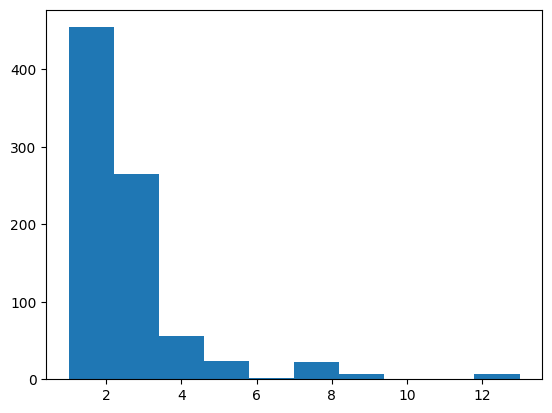

In [13]:
# let's see the probability distribution
plt.hist(train['num_words'])

(array([160.,   0., 294.,   0., 265.,  56.,  25.,   9.,  20.,   7.]),
 array([9.99500333e-04, 2.57402178e-01, 5.13804856e-01, 7.70207534e-01,
        1.02661021e+00, 1.28301289e+00, 1.53941557e+00, 1.79581824e+00,
        2.05222092e+00, 2.30862360e+00, 2.56502628e+00]),
 <BarContainer object of 10 artists>)

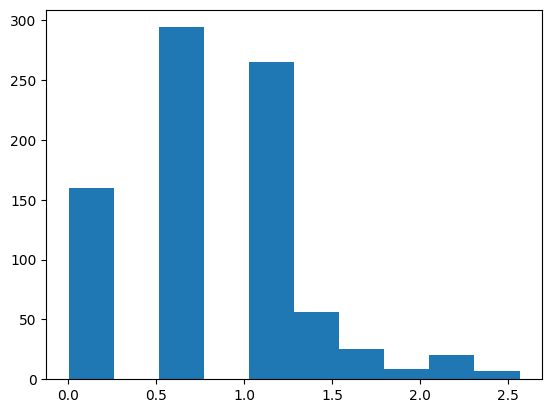

In [14]:
# so we have a Pareto distribution, it's usually better to apply log transformation to get a normal distribution 
plt.hist(np.log(train['num_words']+0.001))

In [15]:
#average og length of commands 
train['mean_word_len'] = train['command'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [16]:
train

,command,danger,num_words,mean_word_len
0,cat /sys/bus/usb/devices/usb1/power/control,NO,2,21.00
1,cat /sys/bus/usb/devices/usb1/power/runtime_st...,NO,2,24.50
2,cat /sys/bus/usb/devices/usb2/power/runtime_st...,NO,2,24.50
3,cat /sys/bus/usb/devices/usb3/power/runtime_st...,NO,2,24.50
4,cat /sys/bus/usb/devices/usb4/power/runtime_st...,NO,2,24.50
...,...,...,...,...
832,python3 +AC0-V,YES,2,6.50
833,apt install python 3.7.4,YES,4,5.25
834,python +AC0-V,NO,2,6.00
835,python3 +AC0-V,YES,2,6.50


In [17]:
train["num_unique_words"] = train['command'].apply(lambda x: len(set(str(x).split())))

In [18]:
train

,command,danger,num_words,mean_word_len,num_unique_words
0,cat /sys/bus/usb/devices/usb1/power/control,NO,2,21.00,2
1,cat /sys/bus/usb/devices/usb1/power/runtime_st...,NO,2,24.50,2
2,cat /sys/bus/usb/devices/usb2/power/runtime_st...,NO,2,24.50,2
3,cat /sys/bus/usb/devices/usb3/power/runtime_st...,NO,2,24.50,2
4,cat /sys/bus/usb/devices/usb4/power/runtime_st...,NO,2,24.50,2
...,...,...,...,...,...
832,python3 +AC0-V,YES,2,6.50,2
833,apt install python 3.7.4,YES,4,5.25,4
834,python +AC0-V,NO,2,6.00,2
835,python3 +AC0-V,YES,2,6.50,2


In [19]:
train['num_chars'] = train['command'].apply(lambda x: len(str(x)))

In [20]:
train

,command,danger,num_words,mean_word_len,num_unique_words,num_chars
0,cat /sys/bus/usb/devices/usb1/power/control,NO,2,21.00,2,43
1,cat /sys/bus/usb/devices/usb1/power/runtime_st...,NO,2,24.50,2,50
2,cat /sys/bus/usb/devices/usb2/power/runtime_st...,NO,2,24.50,2,50
3,cat /sys/bus/usb/devices/usb3/power/runtime_st...,NO,2,24.50,2,50
4,cat /sys/bus/usb/devices/usb4/power/runtime_st...,NO,2,24.50,2,50
...,...,...,...,...,...,...
832,python3 +AC0-V,YES,2,6.50,2,14
833,apt install python 3.7.4,YES,4,5.25,4,24
834,python +AC0-V,NO,2,6.00,2,13
835,python3 +AC0-V,YES,2,6.50,2,14


In [21]:
## Number of title case words in the text ##
train["num_words_upper"] = train["command"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

In [22]:
train

,command,danger,num_words,mean_word_len,num_unique_words,num_chars,num_words_upper
0,cat /sys/bus/usb/devices/usb1/power/control,NO,2,21.00,2,43,0
1,cat /sys/bus/usb/devices/usb1/power/runtime_st...,NO,2,24.50,2,50,0
2,cat /sys/bus/usb/devices/usb2/power/runtime_st...,NO,2,24.50,2,50,0
3,cat /sys/bus/usb/devices/usb3/power/runtime_st...,NO,2,24.50,2,50,0
4,cat /sys/bus/usb/devices/usb4/power/runtime_st...,NO,2,24.50,2,50,0
...,...,...,...,...,...,...,...
832,python3 +AC0-V,YES,2,6.50,2,14,1
833,apt install python 3.7.4,YES,4,5.25,4,24,0
834,python +AC0-V,NO,2,6.00,2,13,1
835,python3 +AC0-V,YES,2,6.50,2,14,1


In [23]:
import string
## Number of punctuations in the text ##
train["num_punctuations"] =train['command'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

In [24]:
train

,command,danger,num_words,mean_word_len,num_unique_words,num_chars,num_words_upper,num_punctuations
0,cat /sys/bus/usb/devices/usb1/power/control,NO,2,21.00,2,43,0,7
1,cat /sys/bus/usb/devices/usb1/power/runtime_st...,NO,2,24.50,2,50,0,8
2,cat /sys/bus/usb/devices/usb2/power/runtime_st...,NO,2,24.50,2,50,0,8
3,cat /sys/bus/usb/devices/usb3/power/runtime_st...,NO,2,24.50,2,50,0,8
4,cat /sys/bus/usb/devices/usb4/power/runtime_st...,NO,2,24.50,2,50,0,8
...,...,...,...,...,...,...,...,...
832,python3 +AC0-V,YES,2,6.50,2,14,1,2
833,apt install python 3.7.4,YES,4,5.25,4,24,0,2
834,python +AC0-V,NO,2,6.00,2,13,1,2
835,python3 +AC0-V,YES,2,6.50,2,14,1,2


In [25]:
train.describe

<bound method NDFrame.describe of                                                command danger  num_words  \
0          cat /sys/bus/usb/devices/usb1/power/control     NO          2   
1    cat /sys/bus/usb/devices/usb1/power/runtime_st...     NO          2   
2    cat /sys/bus/usb/devices/usb2/power/runtime_st...     NO          2   
3    cat /sys/bus/usb/devices/usb3/power/runtime_st...     NO          2   
4    cat /sys/bus/usb/devices/usb4/power/runtime_st...     NO          2   
..                                                 ...    ...        ...   
832                                     python3 +AC0-V    YES          2   
833                           apt install python 3.7.4    YES          4   
834                                      python +AC0-V     NO          2   
835                                     python3 +AC0-V    YES          2   
836                                        apt upgrade     NO          2   

     mean_word_len  num_unique_words  num_chars  num_

In [26]:
train.shape

(836, 8)

In [27]:
train.describe(exclude=np.number)


,command,danger
count,836,836
unique,494,2
top,clear,NO
freq,52,426


In [46]:
# Convert 'danger' column to boolean 
train['danger'] = train['danger'].map({'YES': True, 'NO': False})
train['danger'].dtype

dtype('bool')

In [48]:
# Building xgboost matrix
from sklearn.model_selection import train_test_split

# Extract feature and target arrays
X, y = train.drop('danger', axis=1), train[['danger']]

,command,num_words,mean_word_len,num_unique_words,num_chars,num_words_upper,num_punctuations
0,cat /sys/bus/usb/devices/usb1/power/control,2,21.00,2,43,0,7
1,cat /sys/bus/usb/devices/usb1/power/runtime_st...,2,24.50,2,50,0,8
2,cat /sys/bus/usb/devices/usb2/power/runtime_st...,2,24.50,2,50,0,8
3,cat /sys/bus/usb/devices/usb3/power/runtime_st...,2,24.50,2,50,0,8
4,cat /sys/bus/usb/devices/usb4/power/runtime_st...,2,24.50,2,50,0,8
...,...,...,...,...,...,...,...
832,python3 +AC0-V,2,6.50,2,14,1,2
833,apt install python 3.7.4,4,5.25,4,24,0,2
834,python +AC0-V,2,6.00,2,13,1,2
835,python3 +AC0-V,2,6.50,2,14,1,2


In [49]:
y

,danger
0,False
1,False
2,False
3,False
4,False
...,...
832,True
833,True
834,False
835,True


In [50]:
#The dataset has three categorical columns. Normally, you would encode them with ordinal or one-hot encoding, but XGBoost has the ability to internally deal with categoricals.
#The way to enable this feature is to cast the categorical columns into Pandas category data type (by default, they are treated as text columns):
# Extract text features
cats = X.select_dtypes(exclude=np.number).columns.tolist()

# Convert to Pandas category
for col in cats:
   X[col] = X[col].astype('category')

In [51]:
X.dtypes

command             category
num_words              int64
mean_word_len        float64
num_unique_words       int64
num_chars              int64
num_words_upper        int64
num_punctuations       int64
dtype: object

In [52]:
y.dtypes

danger    bool
dtype: object

In [53]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [54]:
import xgboost as xgb 

# Create regression matrices 

dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True) 
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True) 

In [55]:
# Define hyperparameters
params = {"objective": "reg:squarederror"} 

In [57]:
n = 100 
model = xgb.train(
    params=params, 
    dtrain=dtrain_reg, 
    num_boost_round=n, 
)

In [58]:
# Evaluation 
from sklearn.metrics import mean_squared_error

preds = model.predict(dtest_reg)

In [62]:
rmse = mean_squared_error(y_test, preds)

rmse 

0.25720956921577454

In [74]:
# training with evals
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

In [75]:
n = 5000
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=250, 
 )

[0]	train-rmse:0.39581	validation-rmse:0.47267
[250]	train-rmse:0.24642	validation-rmse:0.50716
[500]	train-rmse:0.24642	validation-rmse:0.50716
[750]	train-rmse:0.24642	validation-rmse:0.50716
[1000]	train-rmse:0.24642	validation-rmse:0.50716
[1250]	train-rmse:0.24642	validation-rmse:0.50716
[1500]	train-rmse:0.24642	validation-rmse:0.50716
[1750]	train-rmse:0.24642	validation-rmse:0.50716
[2000]	train-rmse:0.24642	validation-rmse:0.50716
[2250]	train-rmse:0.24642	validation-rmse:0.50716
[2500]	train-rmse:0.24642	validation-rmse:0.50716
[2750]	train-rmse:0.24642	validation-rmse:0.50716
[3000]	train-rmse:0.24642	validation-rmse:0.50716
[3250]	train-rmse:0.24642	validation-rmse:0.50716
[3500]	train-rmse:0.24642	validation-rmse:0.50716
[3750]	train-rmse:0.24642	validation-rmse:0.50716
[4000]	train-rmse:0.24642	validation-rmse:0.50716
[4250]	train-rmse:0.24642	validation-rmse:0.50716
[4500]	train-rmse:0.24642	validation-rmse:0.50716
[4750]	train-rmse:0.24642	validation-rmse:0.50716
[4999]

In [77]:
params = {"objective": "reg:squarederror"}
n = 1000

results = xgb.cv(
   params, dtrain_reg,
   num_boost_round=n,
   nfold=5,
   early_stopping_rounds=20
)

In [78]:
model

In [79]:
best_rmse = results['test-rmse-mean'].min()

best_rmse



np.float64(0.48116262580324787)